## A simple `A <-> B` reaction between 2 species
with 1st-order kinetics in both directions, taken to equilibrium

See also the experiment _"1D/reactions/reaction_1"_ ; this is the "single-compartment" version of it.

LAST REVISED: Mar. 11, 2023

In [1]:
# Extend the sys.path variable, to contain the project's root directory
import set_path
set_path.add_ancestor_dir_to_syspath(2)  # The number of levels to go up 
                                         # to reach the project's home, from the folder containing this notebook

Added 'D:\Docs\- MY CODE\BioSimulations\life123-Win7' to sys.path


In [2]:
from experiments.get_notebook_info import get_notebook_basename

from src.modules.reactions.reaction_data import ReactionData as chem
from src.modules.reactions.reaction_dynamics import ReactionDynamics

import numpy as np
import plotly.express as px
from src.modules.visualization.graphic_log import GraphicLog

In [3]:
# Initialize the HTML logging (for the graphics)
log_file = get_notebook_basename() + ".log.htm"    # Use the notebook base filename for the log file

# Set up the use of some specified graphic (Vue) components
GraphicLog.config(filename=log_file,
                  components=["vue_cytoscape_1"],
                  extra_js="https://cdnjs.cloudflare.com/ajax/libs/cytoscape/3.21.2/cytoscape.umd.js")

-> Output will be LOGGED into the file 'react_1.log.htm'


# Initialize the System

In [4]:
# Initialize the reaction
chem_data = chem(names=["A", "B"])

# Reaction A <-> B , with 1st-order kinetics in both directions
chem_data.add_reaction(reactants=["A"], products=["B"], 
                       forward_rate=3., reverse_rate=2.)

print("Number of reactions: ", chem_data.number_of_reactions())

Number of reactions:  1


In [5]:
chem_data.describe_reactions()

Number of reactions: 1 (at temp. 25 C)
0: A <-> B  (kF = 3 / kR = 2 / Delta_G = -1,005.13 / K = 1.5) | 1st order in all reactants & products


In [6]:
# Send a plot of the network of reactions to the HTML log file
graph_data = chem_data.prepare_graph_network()
GraphicLog.export_plot(graph_data, "vue_cytoscape_1")

[GRAPHIC ELEMENT SENT TO LOG FILE `react_1.log.htm`]


# Start the simulation

In [7]:
dynamics = ReactionDynamics(reaction_data=chem_data)

In [8]:
# Initial concentrations of all the chemicals, in index order
dynamics.set_conc([10., 50.])

In [9]:
dynamics.describe_state()

SYSTEM STATE at Time t = 0:
2 species:
  Species 0 (A). Conc: 10.0
  Species 1 (B). Conc: 50.0


In [10]:
dynamics.get_history()

,SYSTEM TIME,A,B,caption
0,0.0,10.0,50.0,Initial state


## Start the reaction

In [11]:
# First step of reaction
dynamics.single_compartment_react(initial_step=0.1, n_steps=1,
                                  snapshots={"initial_caption": "first reaction step"})

1 total step(s) taken


In [12]:
dynamics.get_history()

,SYSTEM TIME,A,B,caption
0,0.0,10.0,50.0,Initial state
1,0.1,17.0,43.0,first reaction step


In [13]:
# Numerous more fixed steps
dynamics.single_compartment_react(initial_step=0.1, n_steps=10,
                                  snapshots={"initial_caption": "2nd reaction step",
                                             "final_caption": "last reaction step"})

10 total step(s) taken


#### NOTE: for demonstration purposes, we're using FIXED time steps...  Typically, one would use the option for automated variable time steps (see experiment `react 2`)

In [14]:
dynamics.get_history()

,SYSTEM TIME,A,B,caption
0,0.0,10.000000,50.000000,Initial state
1,0.1,17.000000,43.000000,first reaction step
2,0.2,20.500000,39.500000,2nd reaction step
3,0.3,22.250000,37.750000,
4,0.4,23.125000,36.875000,
5,0.5,23.562500,36.437500,
6,0.6,23.781250,36.218750,
7,0.7,23.890625,36.109375,
8,0.8,23.945312,36.054688,
9,0.9,23.972656,36.027344,


### Check the final equilibrium

In [15]:
dynamics.get_system_conc()

array([23.99316406, 36.00683594])

NOTE: Consistent with the 3/2 ratio of forward/reverse rates (and the 1:1 stoichiometry, and the 1st order reactions), the systems settles in the following equilibrium:

[A] = 23.99316406
 
[B] = 36.00683594


In [16]:
# Verify that the reaction has reached equilibrium
dynamics.is_in_equilibrium()

A <-> B
Final concentrations:  [B] = 36.01 ; [A] = 23.99
1. Ratio of reactant/product concentrations, adjusted for reaction orders: 1.50071
    Formula used:  [B] / [A]
2. Ratio of forward/reverse reaction rates: 1.5
Discrepancy between the two values: 0.04749 %
Reaction IS in equilibrium (within 1% tolerance)



True

### Note that, because of the high initial concentration of B relative to A, the overall reaction has proceeded **in reverse**

## Plots of changes of concentration with time

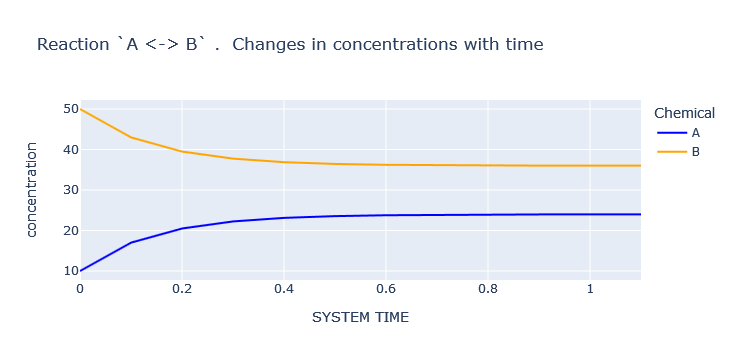

In [28]:
dynamics.plot_curves(colors=['blue', 'orange'])

### Note the raggedness of the left-side (early times) of the curves.  
### In experiment `react_2` this simulation gets repeated with an adaptive variable time resolution that takes smaller steps at the beginning, when the reaction is proceeding faster   
### By contrast, here we used FIXED steps (see below), which is generally a bad approach

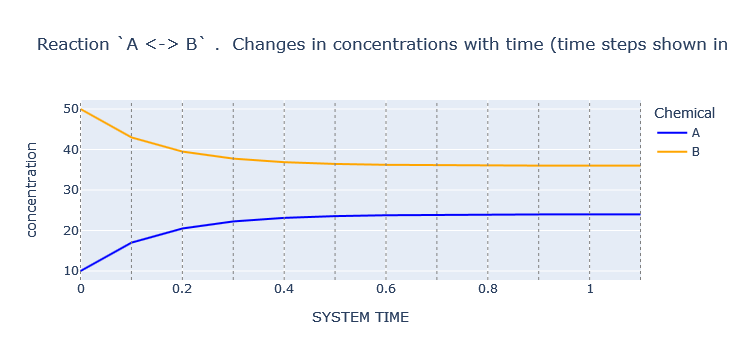

In [29]:
dynamics.plot_curves(colors=['blue', 'orange'], show_intervals=True)

In [18]:
df = dynamics.get_history()

In [19]:
df

,SYSTEM TIME,A,B,caption
0,0.0,10.000000,50.000000,Initial state
1,0.1,17.000000,43.000000,first reaction step
2,0.2,20.500000,39.500000,2nd reaction step
3,0.3,22.250000,37.750000,
4,0.4,23.125000,36.875000,
5,0.5,23.562500,36.437500,
6,0.6,23.781250,36.218750,
7,0.7,23.890625,36.109375,
8,0.8,23.945312,36.054688,
9,0.9,23.972656,36.027344,


## Now investigate A_dot, i.e. d[A]/dt

In [20]:
A = list(df.A)

In [21]:
A

[10.0,
 17.0,
 20.5,
 22.25,
 23.125,
 23.5625,
 23.78125,
 23.890625,
 23.9453125,
 23.97265625,
 23.986328125,
 23.9931640625]

In [22]:
len(A)

12

In [23]:
A_dot = np.gradient(A, 0.1)      # 0.1 is the constant step size

In [24]:
A_dot

array([7.00000000e+01, 5.25000000e+01, 2.62500000e+01, 1.31250000e+01,
       6.56250000e+00, 3.28125000e+00, 1.64062500e+00, 8.20312500e-01,
       4.10156250e-01, 2.05078125e-01, 1.02539062e-01, 6.83593750e-02])

In [25]:
df['A_dot'] = A_dot

In [26]:
df

,SYSTEM TIME,A,B,caption,A_dot
0,0.0,10.000000,50.000000,Initial state,70.000000
1,0.1,17.000000,43.000000,first reaction step,52.500000
2,0.2,20.500000,39.500000,2nd reaction step,26.250000
3,0.3,22.250000,37.750000,,13.125000
4,0.4,23.125000,36.875000,,6.562500
5,0.5,23.562500,36.437500,,3.281250
6,0.6,23.781250,36.218750,,1.640625
7,0.7,23.890625,36.109375,,0.820312
8,0.8,23.945312,36.054688,,0.410156
9,0.9,23.972656,36.027344,,0.205078


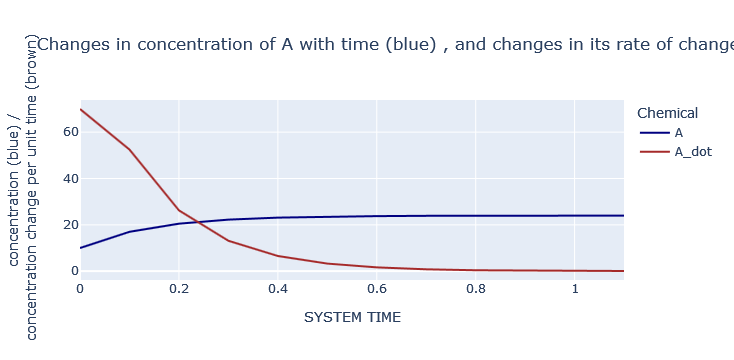

In [27]:
fig = px.line(data_frame=dynamics.get_history(), x="SYSTEM TIME", y=["A", "A_dot"], 
              title="Changes in concentration of A with time (blue) , and changes in its rate of change (brown)",
              color_discrete_sequence = ['navy', 'brown'],
              labels={"value":"concentration (blue) /<br> concentration change per unit time (brown)", "variable":"Chemical"})
fig.show()

### At t=0, [A]=10 and [A] has a high rate of change (70);  
### as the system approaches equilibrium, [A] approaches a value of 24, and its rate of change decays to zero.

The curves are jagged because of limitations of numerically estimating derivatives.